# Visualiation for the Experiment 0

In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
from exp.similarity_measures import total_variational_distance, hellinger_distance

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
from matplotlib import rcParams

fontsize_small = 18
fontsize_large = 24
rcParams['font.size'] = fontsize_small
rcParams['axes.titlesize'] = fontsize_large
rcParams['legend.fontsize'] = fontsize_large
rcParams['xtick.labelsize'] = fontsize_small
rcParams['ytick.labelsize'] = fontsize_small
rcParams['axes.labelsize'] = fontsize_large

## Parameters

In [4]:
file_path = "./data/"

In [5]:
num_shots = 8192
solution_limit_max = 20
num_samples = 100

## Collect Experiments

In [6]:
df = pd.DataFrame()
for solution_limit in range(1, solution_limit_max):
    filename = file_path + "exp0_1_s"+ str(solution_limit) + ".csv"
    local_df = pd.read_csv(filename, index_col=[0])
    local_df = local_df.assign(solution_limit=[solution_limit] * len(local_df))
    df = pd.concat([df, local_df])

In [7]:
sollim_list = pd.unique(df["solution_limit"])
seed_list = pd.unique(df["seed"])
sollim_df_dict = {sollim: df.loc[df["solution_limit"] == sollim] for sollim in sollim_list}

## Quality

In [10]:
boxplot_quality_names = sollim_list
boxplot_quality_data = [[0] * num_samples] * len(sollim_list)
for idx, sollim in enumerate(sollim_list):
    tvd_list = [None] * len(seed_list)
    sollim_df = sollim_df_dict[sollim]
    for idx2, seed in enumerate(seed_list):
        ideal_counts = sollim_df.loc[sollim_df["seed"] == seed]["ideal_count"]
        noise_counts = sollim_df.loc[sollim_df["seed"] == seed]["noise_count"]
        tvd_list[idx2] = total_variational_distance(ideal_counts, noise_counts)
    boxplot_quality_data[idx] = tvd_list

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


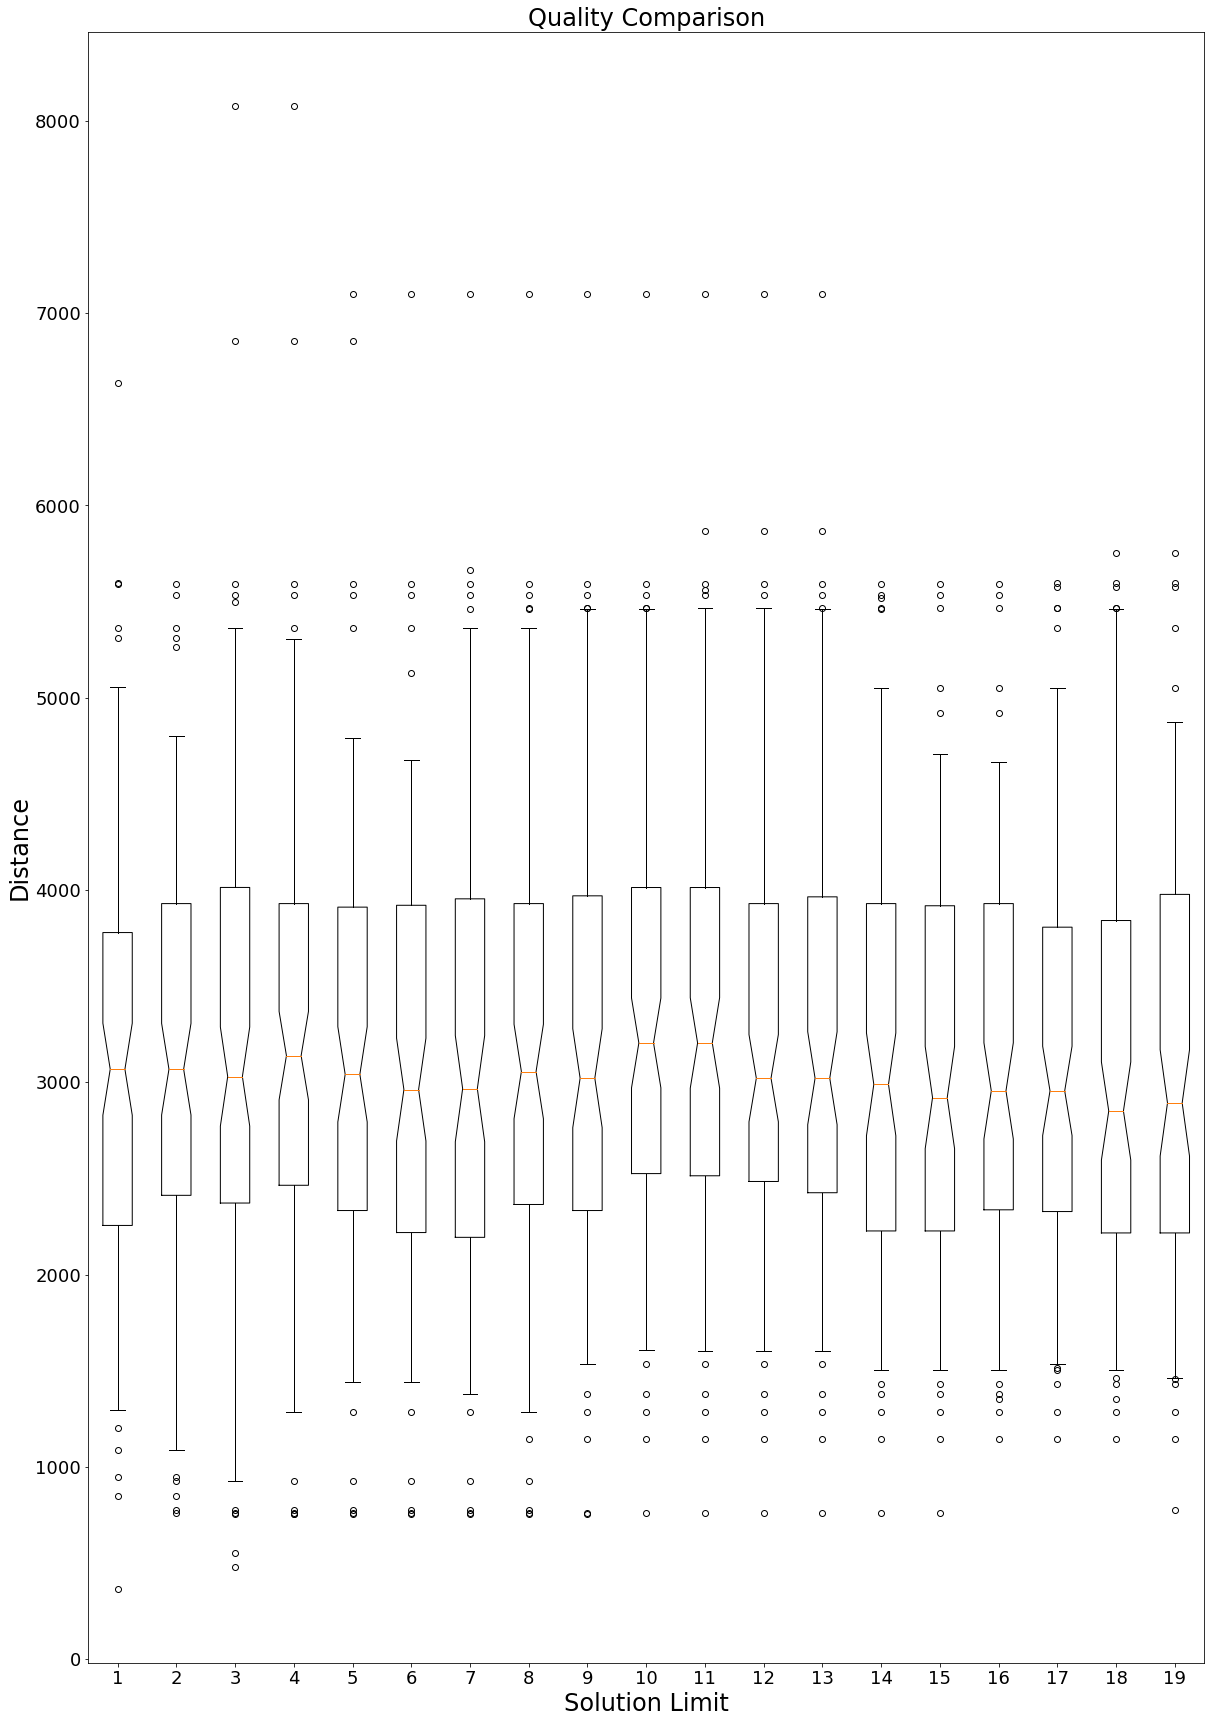

In [11]:
fig, ax = plt.subplots(figsize=(20, 30))
ax.set_title("Quality Comparison")
ax.boxplot(boxplot_quality_data, labels=boxplot_quality_names, notch=True, whis=[5, 95])
ax.set_ylabel("Distance")
ax.set_xlabel("Solution Limit")
plt.show()

## Runtime

In [15]:
boxplot_runtime_names = sollim_list
boxplot_runtime_data = [[0] * num_samples] * len(sollim_list)
for idx, sollim in enumerate(sollim_list):
    df_seed_grp = sollim_df_dict[sollim].groupby("seed")
    times = df_seed_grp["noise_time"].mean().to_numpy()
    boxplot_runtime_data[idx] = times 

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


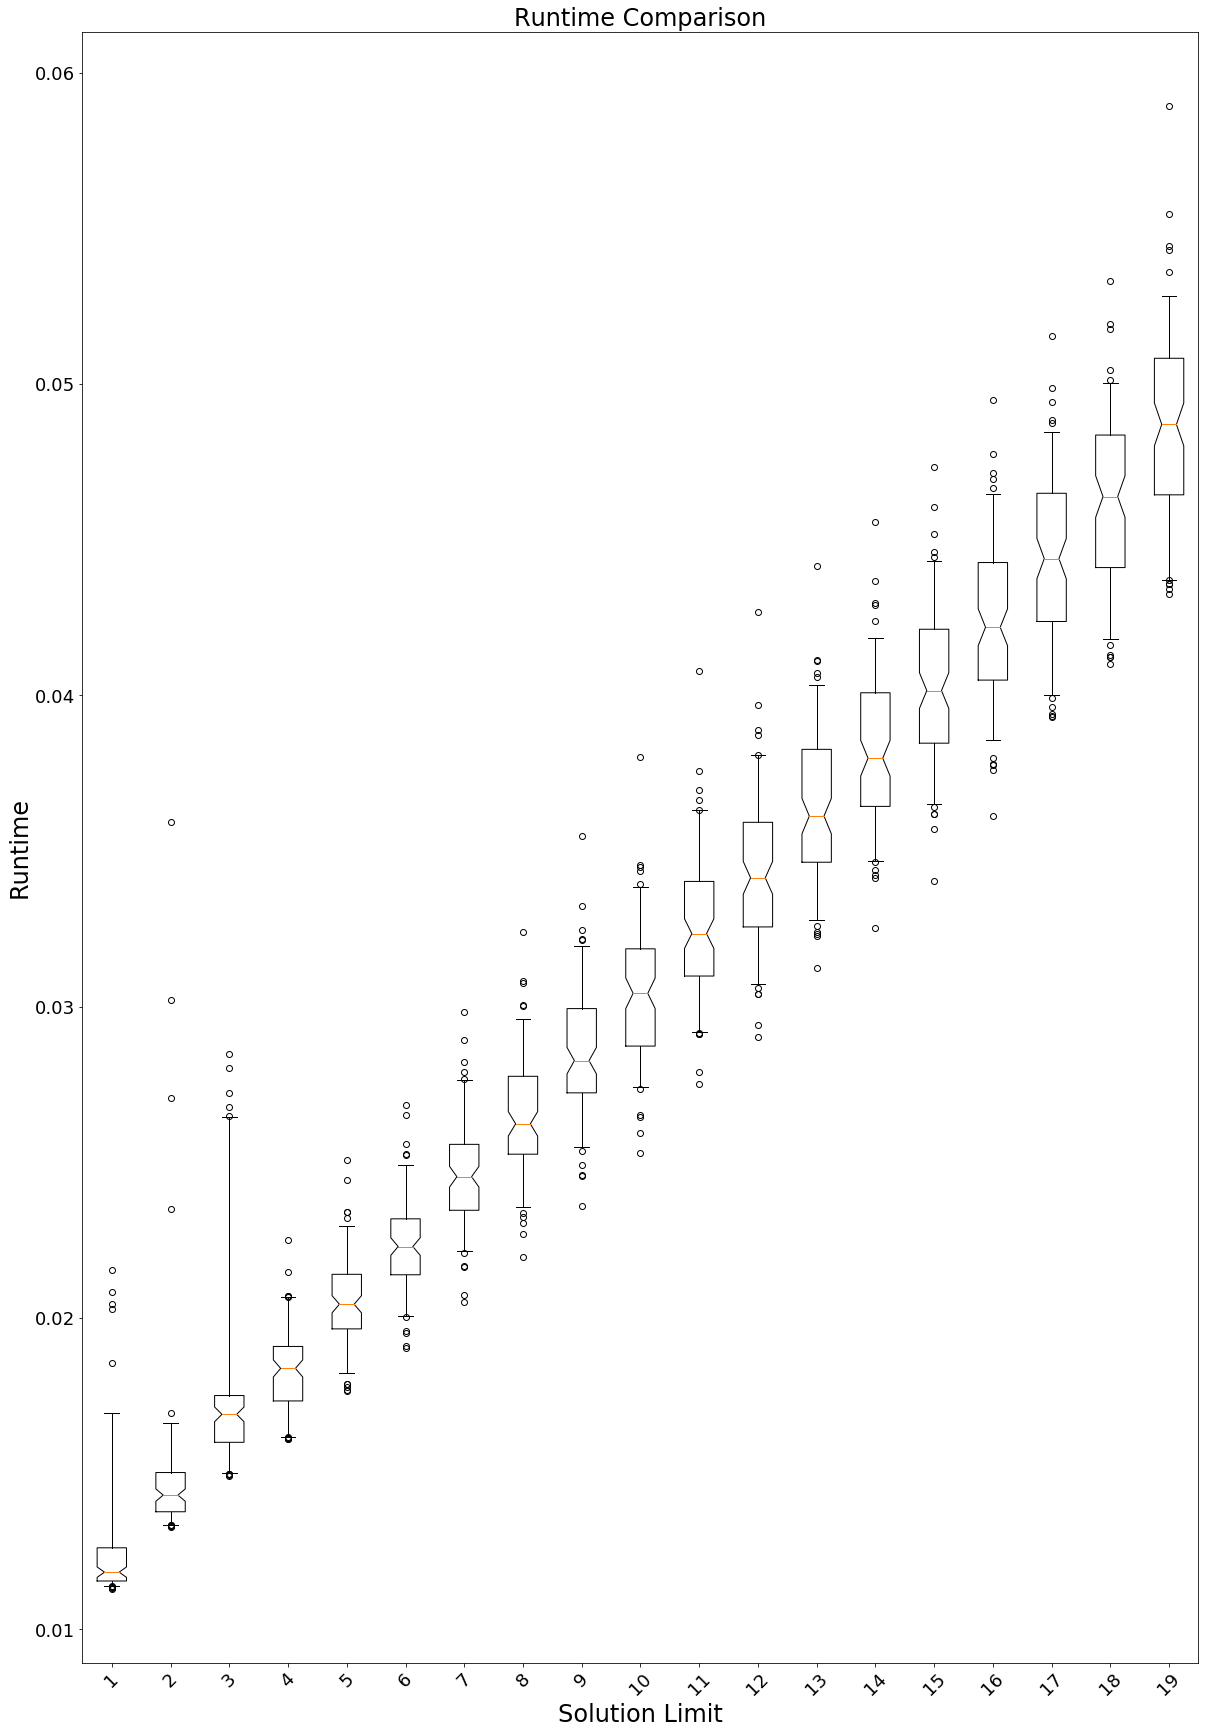

In [19]:
fig, ax = plt.subplots(figsize=(20, 30))
ax.set_title("Runtime Comparison")
ax.boxplot(boxplot_runtime_data, labels=boxplot_runtime_names, notch=True, whis=[5, 95])
ax.set_xticklabels(boxplot_runtime_names, rotation=45)
ax.set_ylabel("Runtime")
ax.set_xlabel("Solution Limit")
plt.show()